# 3. Cerebral Stroke 
# IMBALANCE PROPERTIES: EXTREME

# Contents
1. [Exploratory Data Analysis](#EDA)
2. [Feature Transformation](#FTrans)
3. [Feature Importance](#FI)
4. [Feature Normalization](#FE)
5. [Sampling Techniques](#ST)
6. [Modelling](#Mo)
7. [Model Evaluation](#MOE)
8. [Results](#RS)
    1. [Support Vector Machine (SVM)](#SVM)
    2. [Decision Tree (DT)](#DT)
    3. [Gaussian Naïve Bayes (GNB)](#GNB)
    4. [K-Nearest Neighbourhood (KNN)](#KNN)
    5. [Logistic Regression (LR)](#LR)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline

<a id="EDA"></a>
# 1. Exploratory Data Analysis

In [2]:
path = '/Users/ominguet/Desktop/ClassImbalance_MedicalDatasets/data/external/cerebralstroke.csv'

In [3]:
def eda_stats(path):
    """  
    Exploratory Data Analysis Summary Statistics of the dataframe
   
    Args:
        path: valid string path to filename
    
    Return: 
        None
 
    """
    #Read the dataset
    df = pd.read_csv(path, sep=',', encoding='utf-8')
    print('-------------------------------------------------------------')
    print('')
    # Dataframe columns
    print('Dataframe Columns:')
    print(df.columns)
    print('')
    print('-------------------------------------------------------------')
    print('')
    #Concise summary of the dataframe
    print('Dataframe Summary:')
    print(df.info())
    print('')
    print('-------------------------------------------------------------')
    print('')
    #Returns the dimensions of the array rows & columns
    print('Dataframe Dimensions:')
    print('# of rows:',df.shape[0])
    print('# of columns:',df.shape[1])
    print('')
    print('-------------------------------------------------------------')
    print('')
    #Descriptive or summary statistics of numeric columns
    print('Dataframe Summary Statistics:')
    print(df.describe())
    print('')
    print('-------------------------------------------------------------')
    #Returns missing values
    print('Dataframe Missing Values:')
    print(df.isna().mean().round(4) * 100)
    print('')
    print('-------------------------------------------------------------')

In [4]:
def eda_datavisualization(path, n=5):
    """  
    Exploratory Data Analysis data visualization first, last and 
    random sample rows of the dataframe
   
    Args:
        path: valid string path to filename
        n: number of rows to select. Default = 5
    
    Return: 
        None
 
    """
    #Read the dataset
    df = pd.read_csv(path, sep=',', encoding='utf-8')
    print('-------------------------------------------------------------')
    print('')
    #Return first rows of dataframe
    print('Dataframe Head:')
    print(df.head(n))
    print('')
    print('-------------------------------------------------------------')
    print('')
    #Return last rows of dataframe
    print('Dataframe Tail:')
    print(df.tail(n))
    print('')
    print('-------------------------------------------------------------')
    print('')
    #Return random sample of rows from dataframe
    print('Dataframe Sample:')
    print(df.sample(n))
    print('')
    print('-------------------------------------------------------------')

In [5]:
def eda_datadistribution(path):
    """  
    Exploratory Data Analysis data distribution of the numerics values 
    of the dataframe. 
    - Boxplot: representation of numerical data groups by their quartiles
    - Histogram: representation of the distribution of the numerical data
    - Heatmap: representation of the relationship or correlation of the 
        numerical values with the dataframe
   
    Args:
        path: valid string path to filename
    
    Return: 
        None
 
    """
    #Read the dataset
    df = pd.read_csv(path, sep=',', encoding='utf-8')
    print('-------------------------------------------------------------')
    print('')
    print('Representation of the distribution of numeric data:')
    df.boxplot(widths = 0.6, rot=45, figsize=[20,10])
    print('')
    df.hist(figsize=[15,10])
    print('')
    corrMatrix = df.corr()
    fig, ax = plt.subplots(figsize=(10,10)) 
    ax = sns.heatmap(corrMatrix, square=True, annot=True, ax=ax)
    ax.set_title('Heatmap Correlation Matrix of numeric data')
    plt.show()
    print('-------------------------------------------------------------')

In [6]:
def eda_labelinformation(column_name):
    """  
    Exploratory Data Analysis of the target feature
   
    Args:
        column_name: valid string column name from the 
            dataframe
    
    Return: 
        None
 
    """
    #Read the dataset
    df = pd.read_csv(path, sep=',', encoding='utf-8')
    # Display value counts of the label
    print('-------------------------------------------------------------')
    print('')
    print('Value counts of the Target Feature')
    print(df[column_name].value_counts())
    print('')    
    print('-------------------------------------------------------------')
    print('')
    print('Percentage of Imbalance Property: {:.2f}%'.format((df[column_name].value_counts()[1] * 100 / df[column_name].value_counts()[0])))
    print('')
    print('-------------------------------------------------------------')
    print('')
    ax = sns.countplot(x = df[column_name])
    ax.set_title('Number of Observations per Class', fontsize=18)
    ax.set_xlabel(column_name, fontsize=16)
    ax.set_ylabel('count', fontsize=16)
    plt.show()
    print('')
    print('-------------------------------------------------------------')

In [7]:
eda_stats(path)

-------------------------------------------------------------

Dataframe Columns:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

-------------------------------------------------------------

Dataframe Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  flo

In [8]:
eda_datavisualization(path)

-------------------------------------------------------------

Dataframe Head:
      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3      

-------------------------------------------------------------

Representation of the distribution of numeric data:




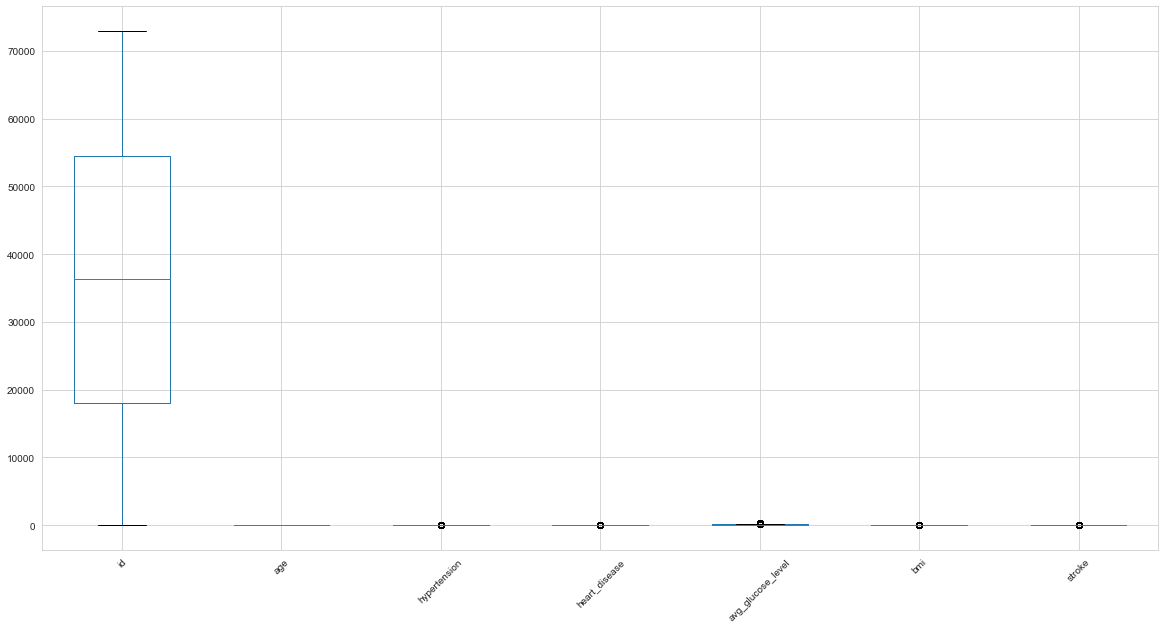

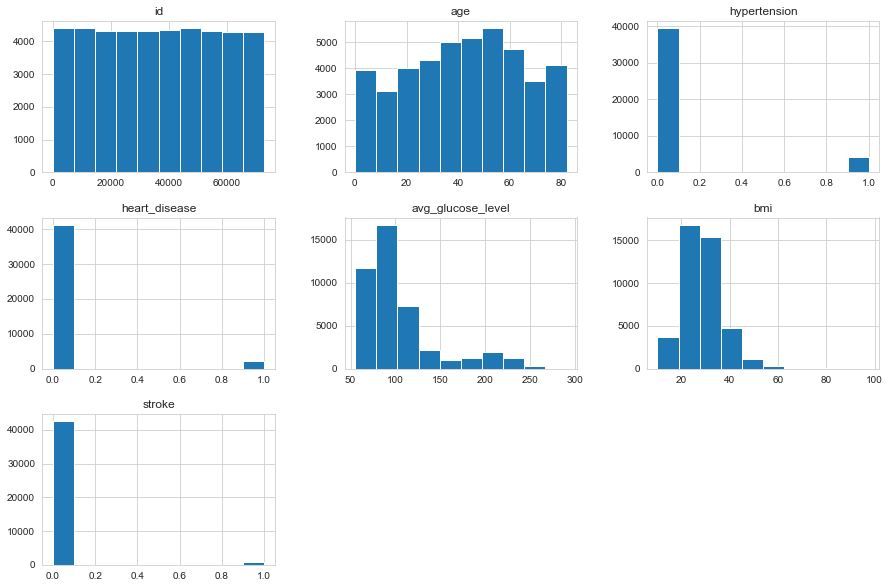

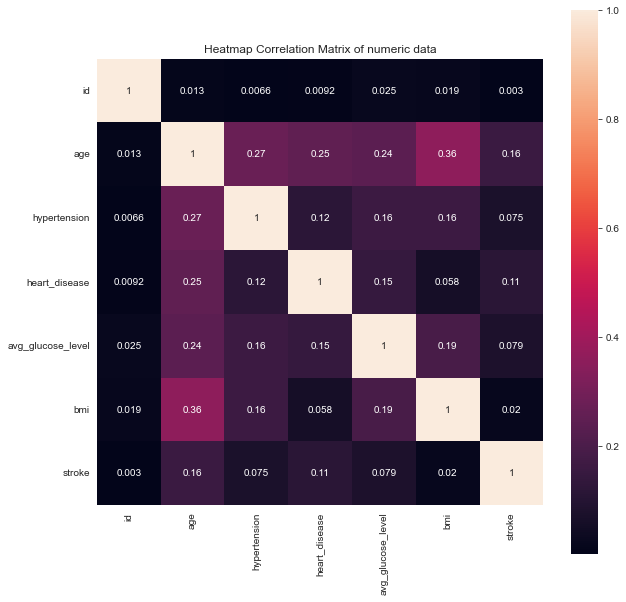

-------------------------------------------------------------


In [9]:
eda_datadistribution(path)

-------------------------------------------------------------

Value counts of the Target Feature
0    42617
1      783
Name: stroke, dtype: int64

-------------------------------------------------------------

Percentage of Imbalance Property: 1.84%

-------------------------------------------------------------



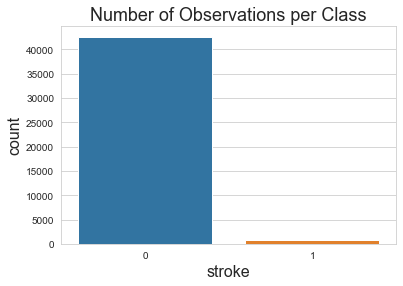


-------------------------------------------------------------


In [10]:
eda_labelinformation('stroke')

<a id="FTrans"></a>
# 2. Feature Transformation

In [11]:
df = pd.read_csv(path, sep=',', encoding='utf-8')
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column         value                  
Residence_type Rural             21644
               Urban             21756
ever_married   No                15462
               Yes               27938
gender         Other                11
               Male              17724
               Female            25665
smoking_status smokes             6562
               formerly smoked    7493
               never smoked      16053
work_type      Never_worked        177
               Govt_job           5440
               children           6156
               Self-employed      6793
               Private           24834

Smoking Status

In [12]:
df['smoking_status'] = df['smoking_status'].fillna('unknown')

In [13]:
smoking_status_mapper = {
    "smokes": 1,
    "formerly smoked": 2,
    "never smoked": 3,
    "unknown": 4,
}
df['smoking_status'] = df['smoking_status'].replace(smoking_status_mapper)

In [14]:
df['smoking_status'].value_counts()

3    16053
4    13292
2     7493
1     6562
Name: smoking_status, dtype: int64

Gender

In [15]:
gender_mapper = {
    "Female": 1,
    "Male": 2,
    "Other": 3
}
df['gender'] = df['gender'].replace(gender_mapper)

In [16]:
df['gender'].value_counts()

1    25665
2    17724
3       11
Name: gender, dtype: int64

Ever Married

In [17]:
ever_married_mapper = {
    "No": 1,
    "Yes": 2
}
df['ever_married'] = df['ever_married'].replace(ever_married_mapper)

In [18]:
df['ever_married'].value_counts()

2    27938
1    15462
Name: ever_married, dtype: int64

Work Type

In [19]:
work_type_mapper = {
    "Private": 1,
    "Self-employed": 2,
    "children": 3,
    "Govt_job": 4,
    "Never_worked": 5
}
df['work_type'] = df['work_type'].replace(work_type_mapper)

In [20]:
df['work_type'].value_counts()

1    24834
2     6793
3     6156
4     5440
5      177
Name: work_type, dtype: int64

Residence Type

In [21]:
Residence_type_mapper = {
    "Urban": 1,
    "Rural": 2
}
df['Residence_type'] = df['Residence_type'].replace(Residence_type_mapper)

In [22]:
df['Residence_type'].value_counts()

1    21756
2    21644
Name: Residence_type, dtype: int64

BMI

In [23]:
df['bmi'].isna().sum()

1462

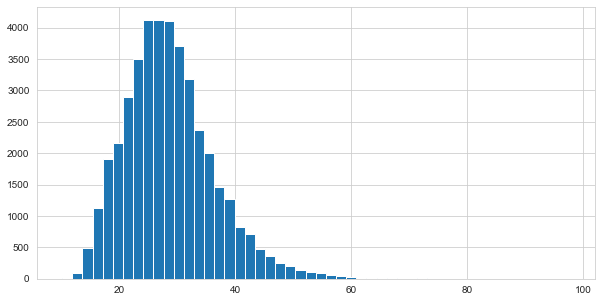

In [24]:
df['bmi'].hist(figsize=[10,5], bins=50);

In [25]:
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

In [26]:
df['bmi'].isna().sum()

0

In [27]:
#Percentage of NAN Values
df.isna().mean().round(4) * 100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [28]:
df.to_csv('/Users/ominguet/Desktop/ClassImbalance_MedicalDatasets/data/processed/cerebralstroke_processed.csv')
path_new = '/Users/ominguet/Desktop/ClassImbalance_MedicalDatasets/data/processed/cerebralstroke_processed.csv'

-------------------------------------------------------------

Representation of the distribution of numeric data:




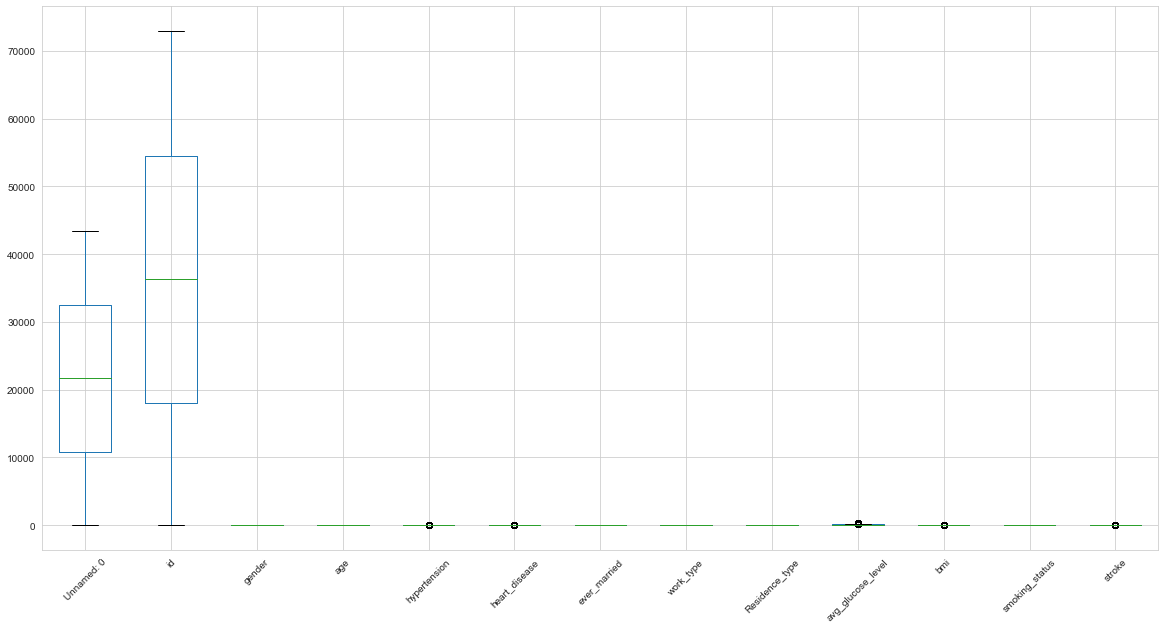

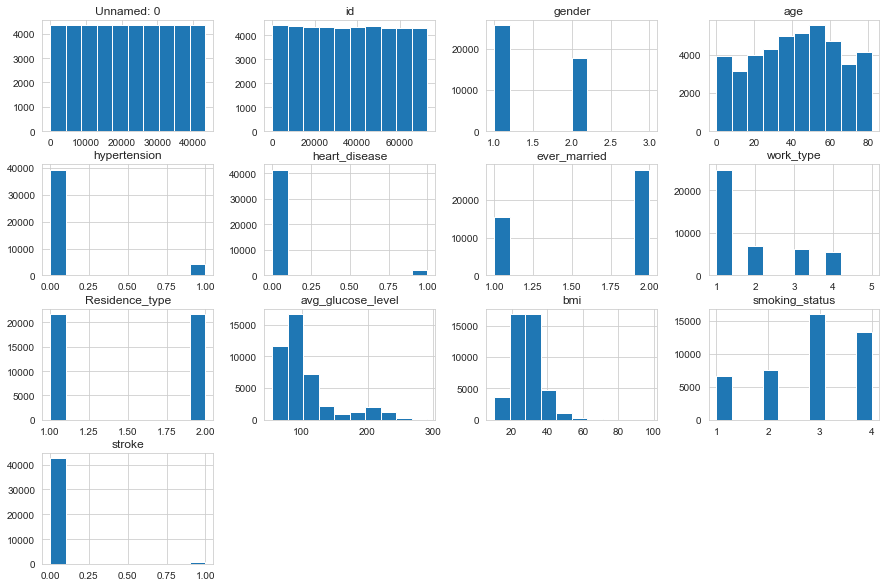

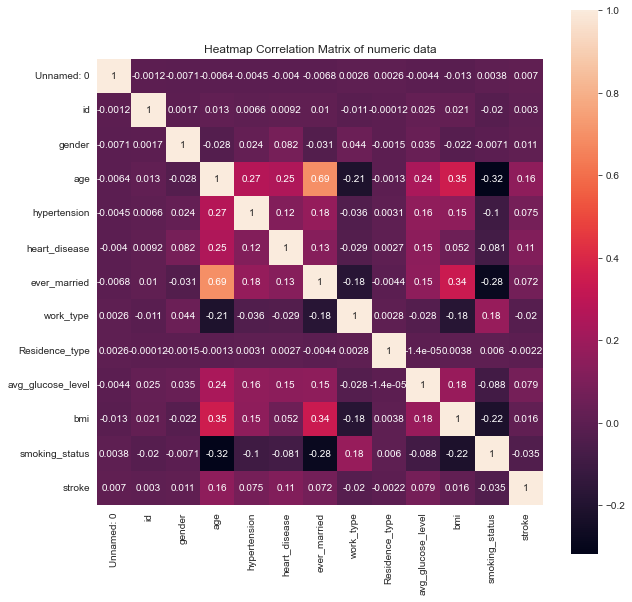

-------------------------------------------------------------


In [29]:
eda_datadistribution(path_new)

---

<a id="FI"></a>
# 3. Feature Importance

## Diabetes classification with LightGBM - SHAP

In [ ]:
# !conda install lightgbm -y -U
# !pip install shap

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb # Light GBM is a gradient boosting framework that uses tree based learning algorithm
import shap

# print the JS visualization code to the notebook
shap.initjs()

### Load dataset

In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

# create a train/test split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2,random_state=7)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

In [ ]:
d_train = lgb.Dataset(train_x, label=train_y)
d_test = lgb.Dataset(test_x, label=test_y)

### Train the model

In [ ]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

### Explain predictions

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

#### SHAP Summary Plot

In [ ]:
shap.summary_plot(shap_values, X)

---

<a id="FE"></a>
# 4. Feature Normalization

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# separate the columns into target and predictors 
X = df.drop('stroke', axis=1).values
y = df['stroke']

In [ ]:
# split the dataset into a training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=13)
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

In [ ]:
# perform a robust scaler transform of the dataset
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

---

<a id="ST"></a>
# 5. Sampling Techniques

In [ ]:
from collections import Counter
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss, InstanceHardnessThreshold, TomekLinks, CondensedNearestNeighbour, AllKNN
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, OneSidedSelection, NeighbourhoodCleaningRule
from imblearn.combine import SMOTEENN, SMOTETomek 
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier

In [ ]:
def evaluate_classificationmodel(X_train, X_test, y_train, y_test, model):
    """  
    Evaluation of a trained binary probabilistic classification model
   
    Args:
        X_train, X_test, y_train, y_test
        model: binary classification supervised model
    
    Return: dict
        results: {
            accuracy
            precision, recall, fscore 
            n_occurrences
            predictions_count
            tp - true positive
            tn - true negative
            fp - false positive
            fn - false negative
            auc - area under the curve
            }
    """
    # model fitting
    model.fit(X_train, y_train)
    # prediction for the evaluation set
    predictions = model.predict(X_test)
    # accuracy
    accuracy = metrics.accuracy_score(y_test, predictions)   
    # precision, recall and f1 score
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    # confusion matrix
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()    
    # fpr and tpr values for various thresholds 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label = 1) 
    # area under the curve
    auc_ = metrics.auc(fpr, tpr)    
    # gather results
    result = {'accuracy': accuracy,
              'precision':precision,
              'recall':recall,
              'fscore':fscore, 
              'n_occurences':support,
              'predictions_count': Counter(predictions),
              'tp':tp, 
              'tn':tn, 
              'fp':fp,
              'fn':fn, 
              'auc':auc_}
    
    return result

In [ ]:
def resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model):
    """    
    Args:
        X_train, X_test, y_train, y_test: test and train split data samples
        model: a trained binary probabilistic classification model
    
    Return: dict
        results: OverSampling, UnderSampling and Hybrid techniques
    """
   
    results = {'ordinary':{},
               'class_weight':{},
               'oversample':{},
               'undersample':{},
               'hybrid':{}}
    
    # ------- Ordinary ----------
    results['ordinary'] = evaluate_classificationmodel(X_train, X_test, y_train, y_test, model)
    
    # ------- Class weight -------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        results['class_weight'] = evaluate_classificationmodel(X_train, X_test, y_train, y_test, model)
        
    # ------ OverSampling techniques -----
    print('   Oversampling methods:')
    techniques = [RandomOverSampler(), SMOTE(), SMOTENC(categorical_features=[1,2]), BorderlineSMOTE(), SVMSMOTE(), 
                  KMeansSMOTE(cluster_balance_threshold=0.01), ADASYN()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['oversample'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # ------ UnderSampling techniques --------
    print('   Undersampling methods:')
    techniques = [RandomUnderSampler(), ClusterCentroids(), NearMiss(), InstanceHardnessThreshold(), TomekLinks(), CondensedNearestNeighbour(), AllKNN(),
                  EditedNearestNeighbours(), RepeatedEditedNearestNeighbours(), OneSidedSelection(), NeighbourhoodCleaningRule()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['undersample'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # ------ Hybrid techniques --------
    print(   'Hybrid methods:')
    techniques = [SMOTEENN(), SMOTETomek()]
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique:{technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
        results['hybrid'][technique] = evaluate_classificationmodel(X_resampled, X_test, y_resampled, y_test, model)
        
    # # ------ Ensemble techniques --------
    # print('-------- Ensemble methods ---------')
    # techniques = [EasyEnsembleClassifier(), RUSBoostClassifier(), BalancedBaggingClassifier(), BalancedRandomForestClassifier()]
    # for sampler in techniques:
    #     technique = sampler.__class__.__name__
    #     print(f'Technique:{technique}')
    #     print(f'Before resampling: {sorted(Counter(y_train).items())}')
    #     X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    #     print(f'After resampling: {sorted(Counter(y_resampled).items())}')        
    #     results['ensemble'][technique] = evaluate_model(X_resampled, X_test, y_resampled, y_test, model)
    
    return results

---

<a id="Mo"></a>
# 6. Modelling

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

---

<a id="MOE"></a>
# 7. Model Evaluation

In [ ]:
def evaluate_resamplingmethod(results, method, metrics = ['precision', 'recall', 'fscore']):
    """
    Evaluation of resampling techniques pipeline of the trained binary probabilistic classification model    
    
    Args:
        results: Model evaluation outputs
        method: oversample, undersample, hybrid
        metrics: precision, recall, fscore
    
    Return:
        None
    """
    
    fig, ax = plt.subplots(1, 3, sharey = True, figsize=(20,6)) 
    
    for i, metric in enumerate(metrics):
        ax[i].axhline(results['ordinary'][metric][0], label = 'No Resampling')
        if results['class_weight']:
            ax[i].bar(0, results['class_weight'][metric][0], label = 'Adjust Class Weight')
        ax[0].legend()
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i].bar(j+1, result[metric][0], label = technique)
        ax[i].set_title(f'Cerebral Stroke:\n{metric}')

In [ ]:
def metrics_dataframe(results):
    """
    Creates a dataframe from the results obtained in the evaluation of the models
    
    Args:
        results: Model evaluation outputs
    
    Return:
        df
    """
    
    # ordinary results
    ordinary = results.get('ordinary', {})
    df_ordinary = pd.DataFrame.from_dict(ordinary, orient='index').T
    df_ordinary.insert(0, 'method','ordinary')
    
    #class weight results
    class_weight = results.get('class_weight',{})
    df_classweight = pd.DataFrame.from_dict(class_weight, orient='index').T
    df_classweight.insert(0, 'method','class_weight')
    
    # sampling techniques results
    sampling = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in results.items()}, axis=0)
    sampling = sampling.drop(0, axis=1)
    sampling = sampling.dropna(how='all')
    sampling = sampling.droplevel(0, axis=0)
    sampling.index.name = 'method'
    sampling = sampling.reset_index()
    
    #concat dataframes
    output = pd.concat([df_ordinary, df_classweight], ignore_index=True)
    results = pd.concat([output, sampling], ignore_index=True)
    
    return results

---

<a id="RS"></a>
# 8. Results

<a id="SVM"></a>
## Support Vector Machine (SVM)

In [ ]:
%%time
model_svc = SVC()
results_svc = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_svc)

In [ ]:
evaluate_resamplingmethod(results_svc, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_svc, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_svc, 'hybrid')

In [ ]:
svc = metrics_dataframe(results_svc)
svc.to_html('svc_results_stroke.html')

<a id="DT"></a>

## Decision Tree (DT)

In [ ]:
%%time
model_tree = DecisionTreeClassifier()
results_tree = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_tree)

In [ ]:
evaluate_resamplingmethod(results_tree, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_tree, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_tree, 'hybrid')

In [ ]:
tree = metrics_dataframe(results_tree)
tree.to_html('tree_results_stroke.html')

<a id="GNB"></a>
## Gaussian Naïve Bayes (GNB)

In [ ]:
%%time
model_gnb = GaussianNB()
results_gnb = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_gnb)

In [ ]:
evaluate_resamplingmethod(results_gnb, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_gnb, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_gnb, 'hybrid')

In [ ]:
gnb = metrics_dataframe(results_gnb)
gnb.to_html('gnb_results_stroke.html')

<a id="KNN"></a>
## K-Nearest Neighbourhood (KNN)

In [ ]:
%%time
model_knn = KNeighborsClassifier()
results_knn = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_knn)

In [ ]:
evaluate_resamplingmethod(results_knn, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_knn, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_knn, 'hybrid')

In [ ]:
knn = metrics_dataframe(results_knn)
knn.to_html('knn_results_stroke.html')

<a id="LR"></a>
## Logistic Regression (LR)

In [ ]:
%%time
model_lr = LogisticRegression()
results_lr = resampling_techniques_pipeline(X_train, X_test, y_train, y_test, model_lr)

In [ ]:
evaluate_resamplingmethod(results_lr, 'undersample')

In [ ]:
evaluate_resamplingmethod(results_lr, 'oversample')

In [ ]:
evaluate_resamplingmethod(results_lr, 'hybrid')

In [ ]:
lr = metrics_dataframe(results_lr)
lr.to_html('lr_results_stroke.html')